In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#step1 Basic EDA(Exploratory Data Analysis)

In [5]:
df = pd.read_csv("Crop_recommendation.csv")

In [6]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
label_counts = df['label'].value_counts()
print(label_counts)

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


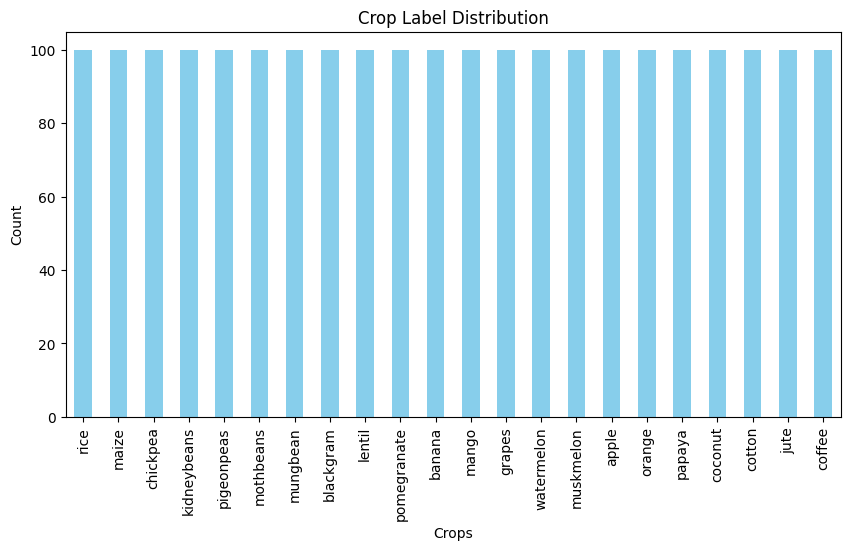

In [12]:
plt.figure(figsize=(10,5))
label_counts.plot(kind='bar',color='skyblue')
plt.title("Crop Label Distribution")
plt.xlabel("Crops")
plt.ylabel("Count")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [15]:
x = df[['N' ,'P', 'K', 'temperature', 'humidity' ,'ph', 'rainfall']]

In [16]:
y = df['label']

In [17]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state=42,stratify=y)

In [18]:
x_train


,N,P,K,temperature,humidity,ph,rainfall
1607,0,18,14,29.771494,92.007200,7.207991,114.416179
1212,9,122,201,29.587484,80.919344,5.570291,68.064173
362,11,71,24,21.140114,22.718235,5.606620,141.605672
566,38,38,18,26.310518,61.187491,6.294130,35.734038
1671,18,12,8,12.590940,91.816688,6.206053,119.391672
...,...,...,...,...,...,...,...
808,13,64,20,19.134577,62.575269,6.590571,36.469470
422,16,55,19,19.543141,47.191883,6.413544,192.437219
2052,82,48,36,25.793520,81.769040,6.352077,193.241838
2083,90,50,44,26.916437,73.486560,6.253409,171.471638


In [19]:
y_train


1607         orange
1212         grapes
362     kidneybeans
566       mothbeans
1671         orange
           ...     
808          lentil
422      pigeonpeas
2052           jute
2083           jute
1282         grapes
Name: label, Length: 1760, dtype: object

In [20]:
y_test

1609        orange
1072        banana
1912        cotton
100          maize
1645        orange
           ...    
140          maize
1587         apple
2015          jute
1254        grapes
449     pigeonpeas
Name: label, Length: 440, dtype: object

In [21]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled_df = pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [23]:
x_train_scaled_df

,N,P,K,temperature,humidity,ph,rainfall
0,-1.371628,-1.072910,-0.673510,0.819481,0.924395,0.937545,0.199440
1,-1.127411,2.084513,3.015261,0.783251,0.426613,-1.153846,-0.643677
2,-1.073140,0.536162,-0.476250,-0.879968,-2.186291,-1.107452,0.694001
3,-0.340487,-0.465713,-0.594606,0.138043,-0.459237,-0.229482,-1.231744
4,-0.883193,-1.255069,-0.791866,-2.563232,0.915842,-0.341959,0.289941
...,...,...,...,...,...,...,...
1755,-1.018869,0.323643,-0.555154,-1.274842,-0.396933,0.149081,-1.218366
1756,-0.937463,0.050404,-0.574880,-1.194399,-1.087561,-0.076988,1.618598
1757,0.853467,-0.162115,-0.239537,0.036250,0.464759,-0.155483,1.633233
1758,1.070550,-0.101395,-0.081729,0.257343,0.092922,-0.281484,1.237246


In [24]:
models = {
    "RandomForest" : RandomForestClassifier(n_estimators=200,random_state=42),
    "DecisionTree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression" : LogisticRegression(max_iter=200,random_state=42),
    "SVM(RBF Kernal)" : SVC(kernel='rbf',random_state=42),
}

In [25]:
results = []
for name,model in models.items():
  if name in ["KNN" , "Logistic Regression" , "SVM(RBF Kernal)"]:
    model.fit(x_train_scaled,y_train)
    preds = model.predict(x_test_scaled)
  else:
    model.fit(x_train,y_train)
    preds = model.predict(x_test)

  acc = accuracy_score(y_test,preds)
  results.append((name,acc))

In [26]:
results

[('RandomForest', 0.9954545454545455),
 ('DecisionTree', 0.9795454545454545),
 ('KNN', 0.9795454545454545),
 ('Logistic Regression', 0.9727272727272728),
 ('SVM(RBF Kernal)', 0.9840909090909091)]

In [27]:
pd.DataFrame(results,columns=["Model","Accuracy"]).sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
0,RandomForest,0.995455
4,SVM(RBF Kernal),0.984091
1,DecisionTree,0.979545
2,KNN,0.979545
3,Logistic Regression,0.972727


In [28]:
import pickle as pkl

In [29]:
best_model = RandomForestClassifier(n_estimators=200,random_state=42)
best_model.fit(x_train,y_train)
preds = best_model.predict(x_test)
acc = accuracy_score(y_test,preds)
print(f"Best Model Accuracy: {acc}")


Best Model Accuracy: 0.9954545454545455


In [30]:
bundle = {
    "model" : best_model,
    "feature_cols" : ['N' , 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
    "classes" : best_model.classes_
}

In [31]:
with open('Crop_Recommendation_RF.pkl','wb') as f:
  pkl.dump(bundle,f)
  print("Model Saved Sucessfully")


Model Saved Sucessfully


In [32]:
with open('Crop_Recommendation_RF.pkl','rb') as f:
  b = pkl.load(f)
  print(type(b['classes']))

<class 'numpy.ndarray'>


In [33]:
sample = {'N' : 90,
          'P' : 40,
          'K' : 40,
          'temperature' : 20,
          'humidity' : 80,
          'ph' : 7,
          'rainfall' : 200}
d = [[sample[c] for c in b["feature_cols"]]]
d

[[90, 40, 40, 20, 80, 7, 200]]

In [34]:
print("Pred:", b["model"].predict(d)[0])

Pred: rice


c:\Users\msraj\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
